In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

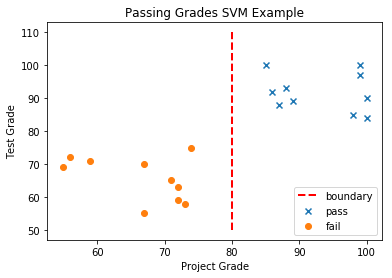

In [2]:
# Example data.
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Reusable function to plot our data.
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

    # We'll eyeball a pass / fail line to split the points.
    plt.plot([80, 80], [50, 110], 'r--', lw=2)

    plt.xlabel('Project Grade')
    plt.ylabel('Test Grade')

setup_plot()
plt.legend(['boundary', 'pass', 'fail'], loc=4)
plt.title('Passing Grades SVM Example')
plt.show()
    

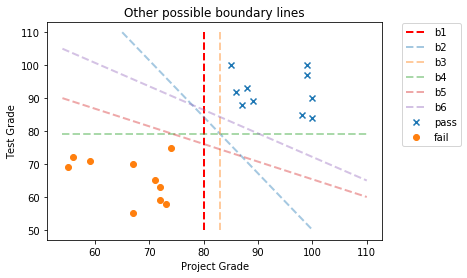

In [3]:
# Throw some other possible boundary lines into the mix.

# Rebuild the previous plot.
setup_plot()

# Add some new boundary lines.
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4)

plt.legend(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'pass', 'fail'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))
plt.title('Other possible boundary lines')
plt.show()

In [4]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

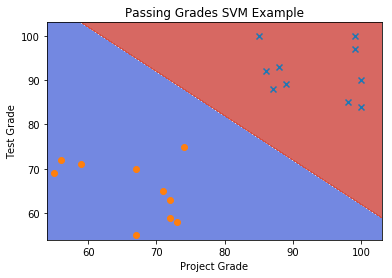

In [5]:
# Visualize our model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()